# Python Implementation:  Hierarchical Clustering

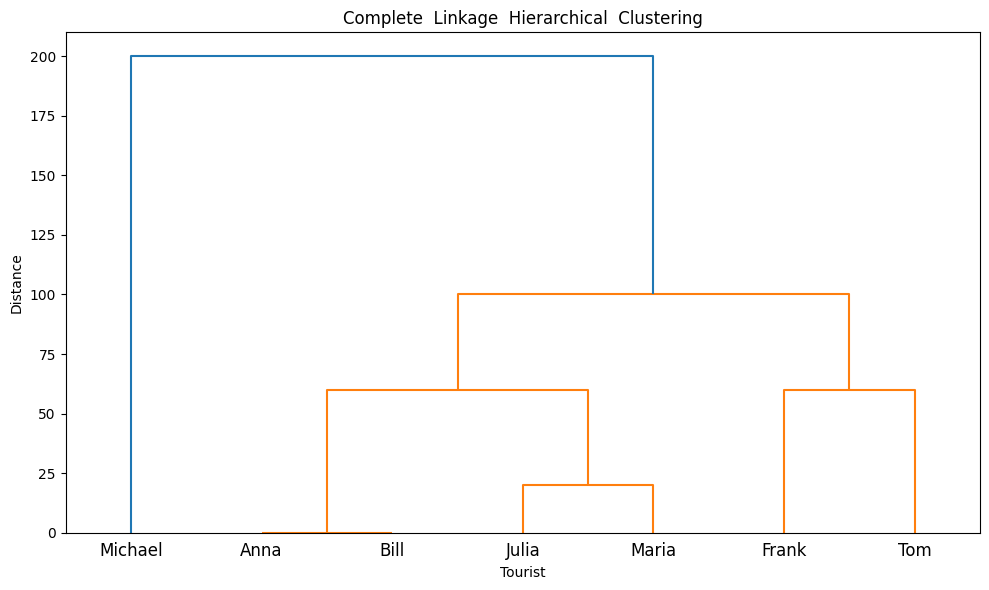


Segment  Characteristics:
         beach  action  culture
Segment                        
1         87.5     0.0     12.5
2         55.0    30.0     15.0
3          0.0    90.0     10.0


In [9]:
import  numpy  as  np
import  pandas  as  pd
from  scipy.cluster.hierarchy  import  dendrogram,  linkage,  fcluster
from  scipy.spatial.distance  import  pdist
import  matplotlib.pyplot  as  plt
from  sklearn.preprocessing  import  StandardScaler
#  Example:  Tourist  vacation  activities
data  =  pd.DataFrame({
'beach':  [100,  100,  60,  70,  80,  0,  50],
'action':  [0,  0,  40,  0,  0,  90,  20],
'culture':  [0,  0,  0,  30,  20,  10,  30]
}, index=['Anna', 'Bill', 'Frank', 'Julia', 'Maria', 'Michael', 'Tom'])
#  Standardize  if  needed  (for  variables  on  different  scales)
#  scaler  =  StandardScaler()
#  data_scaled  =  scaler.fit_transform(data)
#  Calculate  pairwise  distances  (Manhattan  distance)
distances  =  pdist(data,  metric='cityblock')    #  'cityblock'  =  Manhattan
#  Perform  hierarchical  clustering  (complete  linkage)
linkage_matrix  =  linkage(distances,  method='complete')
#  Create  dendrogram
plt.figure(figsize=(10,  6))
dendrogram(linkage_matrix,  labels=data.index,  leaf_font_size=12)
plt.xlabel('Tourist')
plt.ylabel('Distance')
plt.title('Complete  Linkage  Hierarchical  Clustering')
plt.tight_layout()
plt.show()
#  Extract  k=3  segments
segments  =  fcluster(linkage_matrix,  t=3,  criterion='maxclust')
data['Segment']  =  segments
#  Display  segment  means
segment_means  =  data.groupby('Segment').mean()
print("\nSegment  Characteristics:")
print(segment_means)

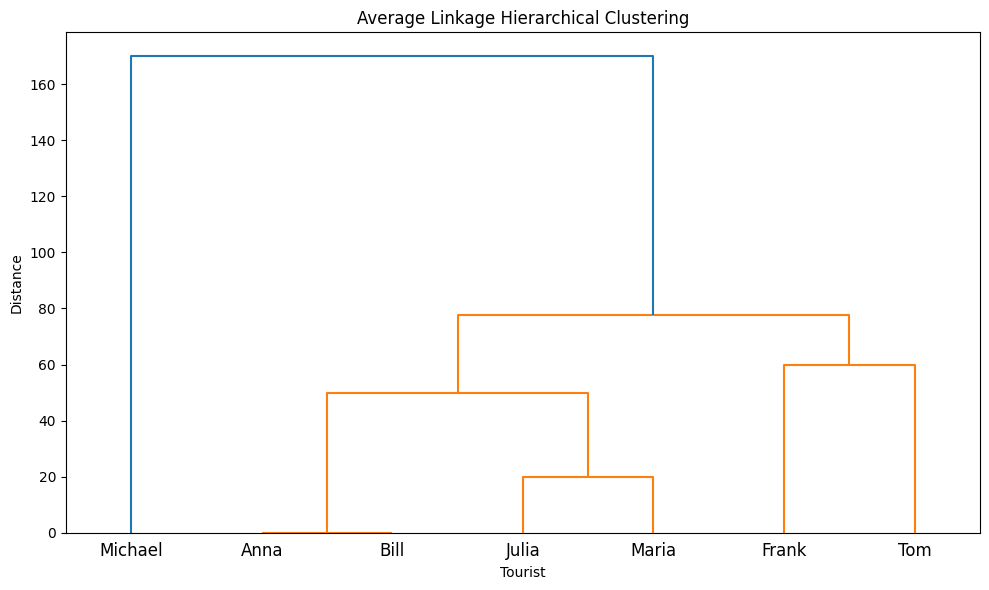

In [10]:
# Perform hierarchical clustering (average linkage)
linkage_matrix_average = linkage(distances, method='average')

# Create dendrogram for average linkage
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix_average, labels=data.index, leaf_font_size=12)
plt.xlabel('Tourist')
plt.ylabel('Distance')
plt.title('Average Linkage Hierarchical Clustering')
plt.tight_layout()
plt.show()

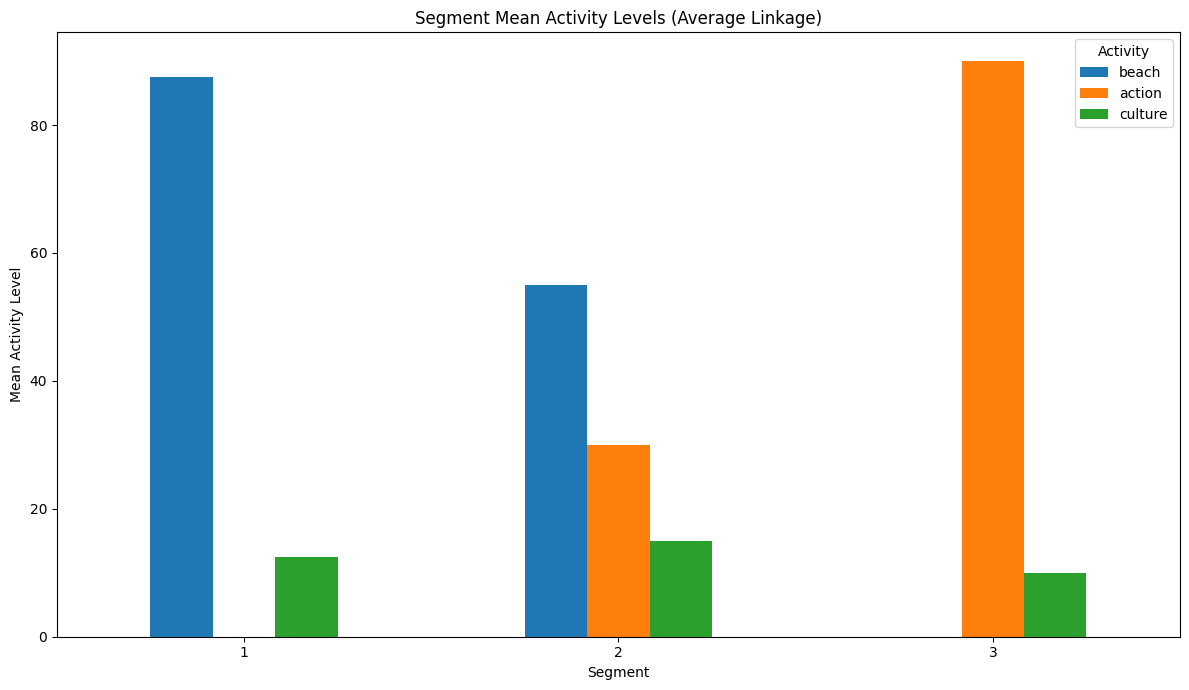

In [8]:
import matplotlib.pyplot as plt

segment_means.plot(kind='bar', figsize=(12, 7))
plt.title('Segment Mean Activity Levels (Average Linkage)')
plt.xlabel('Segment')
plt.ylabel('Mean Activity Level')
plt.xticks(rotation=0)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()

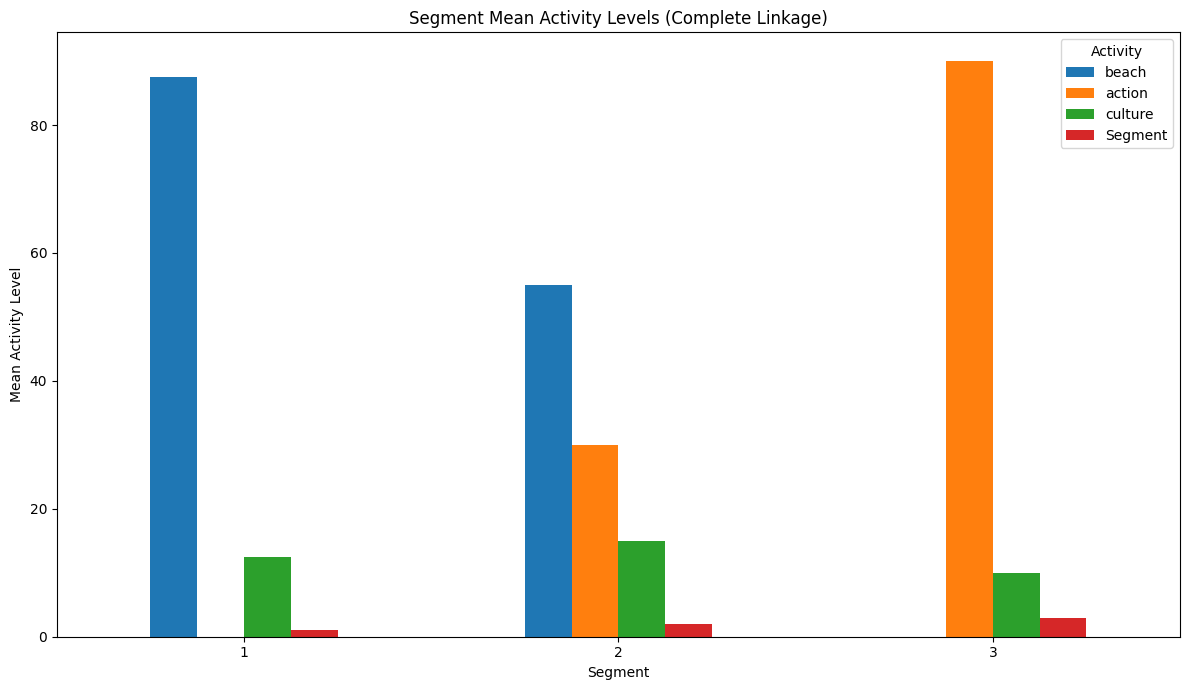

In [7]:
import matplotlib.pyplot as plt

segment_means_complete.plot(kind='bar', figsize=(12, 7))
plt.title('Segment Mean Activity Levels (Complete Linkage)')
plt.xlabel('Segment')
plt.ylabel('Mean Activity Level')
plt.xticks(rotation=0)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()

In [6]:
# Perform hierarchical clustering with 'complete' linkage
linkage_matrix_complete = linkage(distances, method='complete')

# Extract k=3 segments for 'complete' linkage
segments_complete = fcluster(linkage_matrix_complete, t=3, criterion='maxclust')
data_complete = data.copy()
data_complete['Segment_Complete'] = segments_complete

# Display segment means for 'complete' linkage
segment_means_complete = data_complete.groupby('Segment_Complete').mean()
print("\nSegment Characteristics (Complete Linkage):")
print(segment_means_complete)

# Display segment means for 'average' linkage (from previous run)
print("\nSegment Characteristics (Average Linkage):")
print(segment_means)


Segment Characteristics (Complete Linkage):
                  beach  action  culture  Segment
Segment_Complete                                 
1                  87.5     0.0     12.5      1.0
2                  55.0    30.0     15.0      2.0
3                   0.0    90.0     10.0      3.0

Segment Characteristics (Average Linkage):
         beach  action  culture
Segment                        
1         87.5     0.0     12.5
2         55.0    30.0     15.0
3          0.0    90.0     10.0


# Python Implementation:  k-Means Clustering

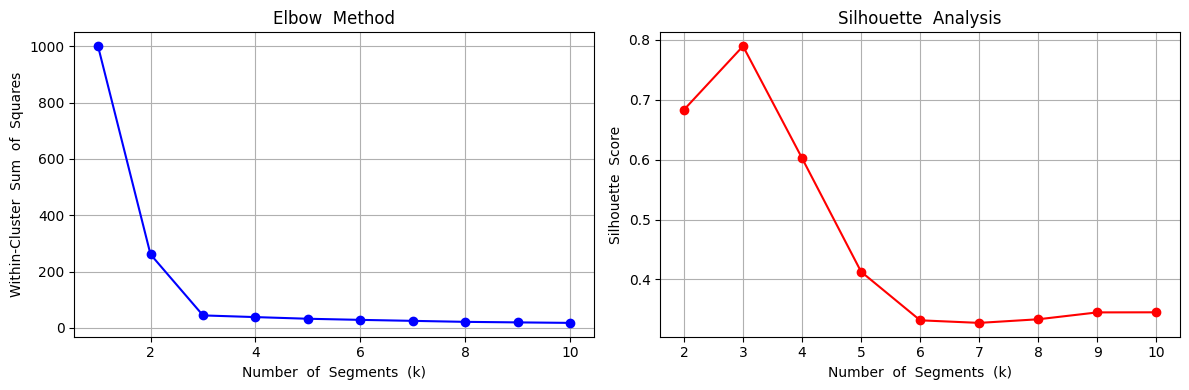

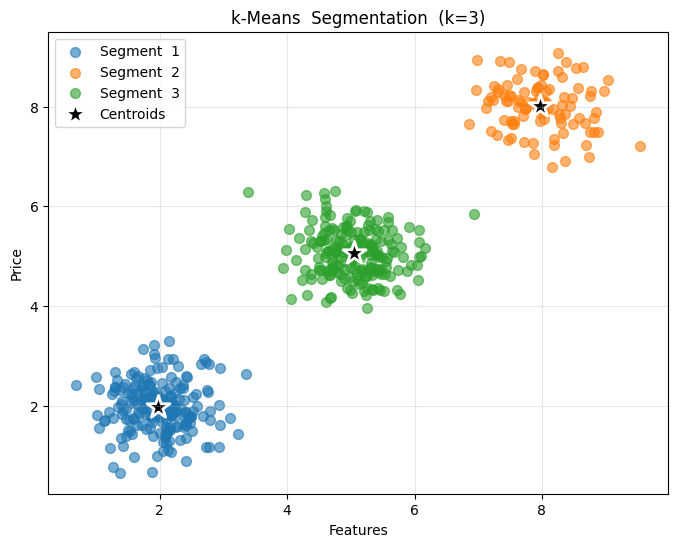


Segment  Profiles:
         features     price
Segment                    
0        1.979615  1.977197
1        7.971998  8.013927
2        5.042934  5.055622

Segment  Sizes:
Segment
0    200
1    100
2    200
Name: count, dtype: int64


In [1]:
import  numpy  as  np
import  pandas  as  pd
from  sklearn.cluster  import  KMeans
from  sklearn.preprocessing  import  StandardScaler
import  matplotlib.pyplot  as  plt
from  sklearn.metrics  import  silhouette_score

#  Generate  or  load  data
np.random.seed(42)
n_consumers  =  500

#  Artificial  mobile  phone  data
features  =  np.concatenate([
    np.random.normal(2,  0.5,  200),
    np.random.normal(5,  0.5,  200),
    np.random.normal(8,  0.5,  100)
])
prices  =  np.concatenate([
    np.random.normal(2,  0.5,  200),
    np.random.normal(5,  0.5,  200),
    np.random.normal(8,  0.5,  100)
])
data = pd.DataFrame({'features': features, 'price': prices})

#  Standardize  (important  for  k-means!)
scaler  =  StandardScaler()
data_scaled  =  scaler.fit_transform(data)

#  Elbow  method:  try  k=1  to  k=10
inertias  =  []
silhouette_scores  =  []
K_range  =  range(1,  11)

for  k  in  K_range:
    kmeans  =  KMeans(n_clusters=k,  n_init=10,  random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    if  k  >  1:
        silhouette_scores.append(silhouette_score(data_scaled,  kmeans.labels_))

#  Plot  elbow  curve
fig,  (ax1,  ax2)  =  plt.subplots(1,  2,  figsize=(12,  4))
ax1.plot(K_range,  inertias,  'bo-')
ax1.set_xlabel('Number  of  Segments  (k)')
ax1.set_ylabel('Within-Cluster  Sum  of  Squares')
ax1.set_title('Elbow  Method')
ax1.grid(True)

ax2.plot(range(2,  11),  silhouette_scores,  'ro-')
ax2.set_xlabel('Number  of  Segments  (k)')
ax2.set_ylabel('Silhouette  Score')
ax2.set_title('Silhouette  Analysis')
ax2.grid(True)

plt.tight_layout()
plt.show()

#  Fit  final  model  with  k=3
kmeans_final  =  KMeans(n_clusters=3,  n_init=50,  random_state=42)
data['Segment']  =  kmeans_final.fit_predict(data_scaled)

#  Visualize  segments
plt.figure(figsize=(8,  6))
for  segment  in  range(3):
    segment_data  =  data[data['Segment']  ==  segment]
    plt.scatter(segment_data['features'],  segment_data['price'], label=f'Segment  {segment+1}',  alpha=0.6,  s=50)

#  Plot  centroids  (transform  back  to  original  scale)
centroids_original  =  scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_original[:,  0],  centroids_original[:,  1],
            c='black',  marker='*',  s=300,  edgecolors='white',  linewidth=2, label='Centroids')
plt.xlabel('Features')
plt.ylabel('Price')
plt.title('k-Means  Segmentation  (k=3)')
plt.legend()
plt.grid(True,  alpha=0.3)
plt.show()

#  Segment  profiles
print("\nSegment  Profiles:")
print(data.groupby('Segment')[['features',  'price']].mean())
print("\nSegment  Sizes:")
print(data['Segment'].value_counts().sort_index())

# Python Implementation:  Self-Organizing Maps

Training  SOM...
Training  complete!


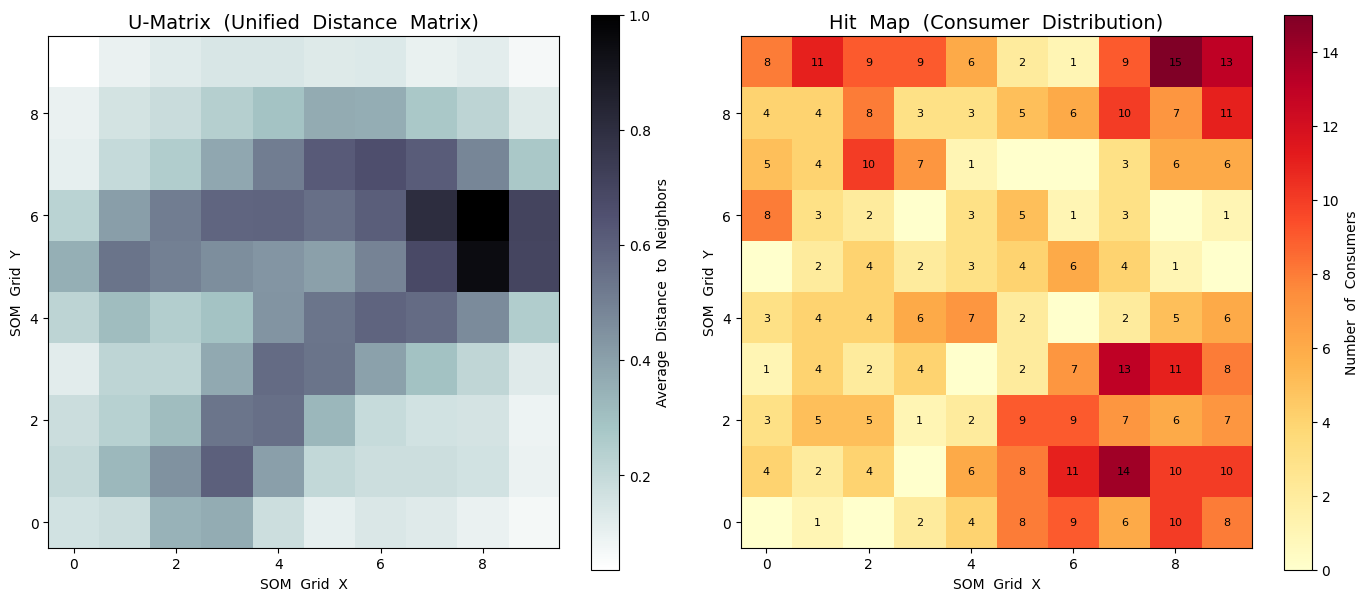

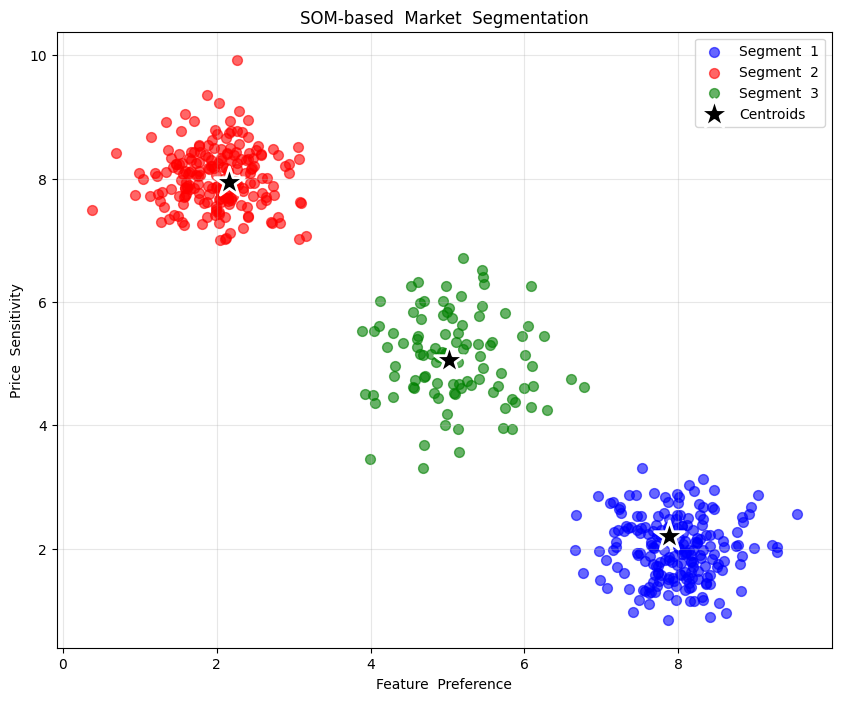


Segment  Profiles:
         feature_preference  price_sensitivity
segment                                       
0                  7.969620           1.992036
1                  2.003171           8.019377
2                  5.088789           5.090763

Segment  Sizes:
segment
0    200
1    200
2    100
Name: count, dtype: int64


In [4]:
import  numpy  as  np
import  pandas  as  pd
from sklearn.preprocessing import StandardScaler
import  matplotlib.pyplot  as  plt
from  matplotlib.patches  import  Rectangle
#  Note:  Need  to  install  minisom  library
#  pip  install  minisom
from  minisom  import  MiniSom
#  Generate  sample  consumer  data
np.random.seed(42)
n_consumers  =  500
#  Three  natural  segments
seg1 = np.random.normal([2, 8], [0.5, 0.5], (200, 2))
seg2 = np.random.normal([8, 2], [0.5, 0.5], (200, 2))
seg3 = np.random.normal([5, 5], [0.7, 0.7], (100, 2))
data  =  np.vstack([seg1,  seg2,  seg3])
data_df = pd.DataFrame(data, columns=['feature_preference', 'price_sensitivity'])
#  Standardize  data
scaler  =  StandardScaler()
data_scaled  =  scaler.fit_transform(data)
#  Initialize  and  train  SOM
som_shape  =  (10,  10)    #  10x10  grid
som  =  MiniSom(som_shape[0],  som_shape[1],  data_scaled.shape[1],
                sigma=1.5,    #  Initial  neighborhood  radius
                learning_rate=0.5,
                neighborhood_function='gaussian')
#  Initialize  weights
som.random_weights_init(data_scaled)
#  Train  SOM
print("Training  SOM...")
som.train_random(data_scaled,  num_iteration=1000)
print("Training  complete!")
#  Visualize  SOM
fig,  (ax1,  ax2)  =  plt.subplots(1,  2,  figsize=(14,  6))
#  Distance  map  (U-matrix)
from  matplotlib.collections  import  PatchCollection
distance_map  =  som.distance_map()
ax1.imshow(distance_map.T,  cmap='bone_r',  origin='lower')
ax1.set_title('U-Matrix  (Unified  Distance  Matrix)',  fontsize=14)
ax1.set_xlabel('SOM  Grid  X')
ax1.set_ylabel('SOM  Grid  Y')
#  Add  colorbar
cbar1  =  plt.colorbar(ax1.images[0],  ax=ax1)
cbar1.set_label('Average  Distance  to  Neighbors')
#  Hit  map  (frequency)
frequencies  =  np.zeros(som_shape)
for  x  in  data_scaled:
    winner  =  som.winner(x)
    frequencies[winner]  +=  1
im2  =  ax2.imshow(frequencies.T,  cmap='YlOrRd',  origin='lower')
ax2.set_title('Hit  Map  (Consumer  Distribution)',  fontsize=14)
ax2.set_xlabel('SOM  Grid  X')
ax2.set_ylabel('SOM  Grid  Y')
#  Annotate  hit  counts
for  i  in  range(som_shape[0]):
    for  j  in  range(som_shape[1]):
        if  frequencies[i,  j]  >  0:
            ax2.text(i,  j,  int(frequencies[i,  j]),
                    ha='center',  va='center',  fontsize=8)
cbar2  =  plt.colorbar(im2,  ax=ax2)
cbar2.set_label('Number  of  Consumers')
plt.tight_layout()
plt.show()
#  Assign  consumers  to  SOM  nodes
som_clusters  =  np.array([som.winner(x)  for  x  in  data_scaled])
data_df['som_x']  =  som_clusters[:,  0]
data_df['som_y']  =  som_clusters[:,  1]
#  Perform  secondary  k-means  clustering  on  SOM  nodes
from  sklearn.cluster  import  KMeans
#  Get  unique  SOM  node  positions
unique_nodes  =  np.unique(som_clusters,  axis=0)
node_weights  =  np.array([som.get_weights()[i,  j]
                          for  i,  j  in  unique_nodes])
#  Cluster  SOM  nodes  into  k=3  macro-segments
kmeans_som  =  KMeans(n_clusters=3,  random_state=42,  n_init=10)
node_labels  =  kmeans_som.fit_predict(node_weights)
#  Map  back  to  consumers
node_to_label  =  {tuple(node):  label  for  node,  label
                   in  zip(unique_nodes,  node_labels)}
data_df['segment']  =  [node_to_label[tuple(pos)]
                        for  pos  in  som_clusters]
#  Visualize  final  segmentation
fig,  ax  =  plt.subplots(figsize=(10,  8))
colors  =  ['blue',  'red',  'green']
for  segment  in  range(3):
    segment_data  =  data_df[data_df['segment']  ==  segment]
    ax.scatter(segment_data['feature_preference'],
               segment_data['price_sensitivity'],
               c=colors[segment],  label=f'Segment  {segment+1}',
               alpha=0.6,  s=50)
#  Plot  segment  centroids
centroids_original  =  scaler.inverse_transform(kmeans_som.cluster_centers_)
ax.scatter(centroids_original[:,  0],  centroids_original[:,  1],
           c='black',  marker='*',  s=500,  edgecolors='white',
           linewidth=2,  label='Centroids',  zorder=5)
ax.set_xlabel('Feature  Preference')
ax.set_ylabel('Price  Sensitivity')
ax.set_title('SOM-based  Market  Segmentation')
ax.legend()
ax.grid(True,  alpha=0.3)
plt.show()
#  Segment  profiles
print("\nSegment  Profiles:")
print(data_df.groupby('segment')[['feature_preference',
'price_sensitivity']].mean())
print("\nSegment  Sizes:")
print(data_df['segment'].value_counts().sort_index())

In [3]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=09ab8fd38c88e5c6b07b43d31320e612a1e146518406395f749a1dc5cb578784
  Stored in directory: /root/.cache/pip/wheels/0f/8c/a4/5b7aa56fa6ef11d536d45da775bcc5a2a1c163ff0f8f11990b
Successfully built minisom


# Python Implementation:  Gaussian Mixture Models

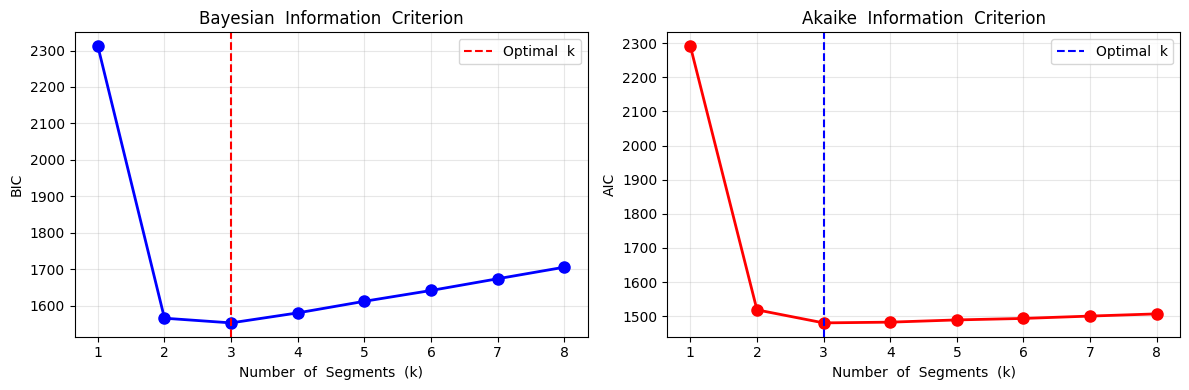

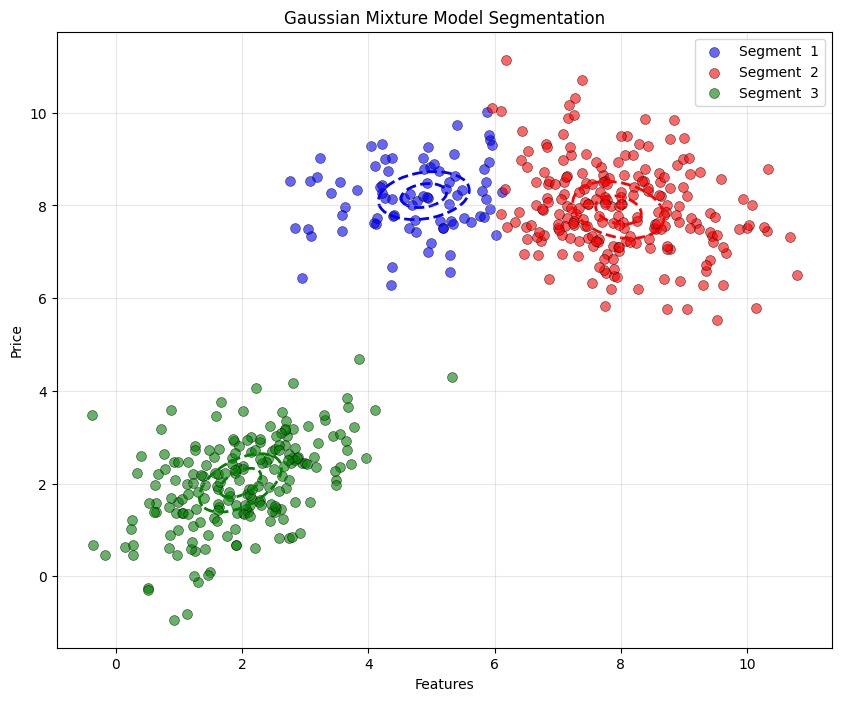


Segment  Profiles  (Original  Scale):
         features               price          
             mean       std      mean       std
segment                                        
0        4.729383  0.876092  8.178534  0.753816
1        7.972666  1.006723  7.921316  0.963334
2        1.975130  0.947746  2.013885  0.971286

Segment  Sizes:
segment
0     82
1    218
2    200
Name: count, dtype: int64

Average  Posterior  Probability  by  Segment:
segment
0    0.907166
1    0.957264
2    0.999988
Name: max_probability, dtype: float64


In [6]:
import  numpy  as  np
import  pandas  as  pd
from  sklearn.mixture  import  GaussianMixture
from  sklearn.preprocessing  import  StandardScaler
import  matplotlib.pyplot  as  plt
from  scipy  import  stats
#  Generate  sample  data
np.random.seed(42)
#  Three  segments  with  different  means  and  covariances
seg1  =  np.random.multivariate_normal([2,  2],  [[1,  0.5],  [0.5,  1]],  200)
seg2  =  np.random.multivariate_normal([8,  8],  [[1,  -0.3],  [-0.3,  1]],  200)
seg3  =  np.random.multivariate_normal([5,  8],  [[2,  0],  [0,  0.5]],  100)
data  =  np.vstack([seg1,  seg2,  seg3])
data_df  =  pd.DataFrame(data,  columns=['features',  'price'])
#  Standardize
scaler  =  StandardScaler()
data_scaled  =  scaler.fit_transform(data)
#  Model  selection:  try  k=1  to  k=8
k_range  =  range(1,  9)
bic_scores = []
aic_scores = []
for  k  in  k_range:
    gmm  =  GaussianMixture(n_components=k,  covariance_type='full',
n_init=10,  random_state=42)
    gmm.fit(data_scaled)
    bic_scores.append(gmm.bic(data_scaled))
    aic_scores.append(gmm.aic(data_scaled))
#  Plot  information  criteria
fig,  (ax1,  ax2)  =  plt.subplots(1,  2,  figsize=(12,  4))
ax1.plot(k_range,  bic_scores,  'bo-',  linewidth=2,  markersize=8)
ax1.set_xlabel('Number  of  Segments  (k)')
ax1.set_ylabel('BIC')
ax1.set_title('Bayesian  Information  Criterion')
ax1.grid(True,  alpha=0.3)
ax1.axvline(x=np.argmin(bic_scores)+1,  color='red',
linestyle='--',  label='Optimal  k')
ax1.legend()
ax2.plot(k_range,  aic_scores,  'ro-',  linewidth=2,  markersize=8)
ax2.set_xlabel('Number  of  Segments  (k)')
ax2.set_ylabel('AIC')
ax2.set_title('Akaike  Information  Criterion')
ax2.grid(True,  alpha=0.3)
ax2.axvline(x=np.argmin(aic_scores)+1,  color='blue',
linestyle='--',  label='Optimal  k')
ax2.legend()
plt.tight_layout()
plt.show()
#  Fit  optimal  model  (k=3)
gmm_optimal  =  GaussianMixture(n_components=3,  covariance_type='full',
n_init=50,  random_state=42)
data_df['segment']  =  gmm_optimal.fit_predict(data_scaled)
data_df['max_probability'] = np.max(gmm_optimal.predict_proba(data_scaled), axis=1)
#  Visualize  with  uncertainty
fig,  ax  =  plt.subplots(figsize=(10,  8))
colors  =  ['blue',  'red',  'green']
for  segment  in  range(3):
    segment_data  =  data_df[data_df['segment']  ==  segment]
    #  Size  reflects  uncertainty  (larger  =  more  uncertain)
    #  sizes  =  100  *  (1  -  segment_data['max_probability'])
    ax.scatter(segment_data['features'],  segment_data['price'],
    c=colors[segment],  s=50,  alpha=0.6,
    label=f'Segment  {segment+1}',  edgecolors='black',  linewidth=0.5)
#  Plot  Gaussian  ellipses
from  matplotlib.patches  import  Ellipse
for  i  in  range(3):
    mean  =  scaler.inverse_transform(gmm_optimal.means_[i:i+1])[0]
    covariance  =  gmm_optimal.covariances_[i]
    #  Transform  covariance  back  to  original  scale
    #  This  is  approximate  for  visualization
    v,  w  =  np.linalg.eigh(covariance)
    angle  =  np.arctan2(w[1,  0],  w[0,  0])  *  180  /  np.pi
    #  2  standard  deviations
    for  n_std  in  [1,  2]:
        ell  =  Ellipse(mean,
        width=2*n_std*np.sqrt(v[0]),
        height=2*n_std*np.sqrt(v[1]),
        angle=angle,
        edgecolor=colors[i],
        facecolor='none',
        linewidth=2,
        linestyle='--')
        ax.add_patch(ell)
ax.set_xlabel('Features')
ax.set_ylabel('Price')
ax.set_title('Gaussian Mixture Model Segmentation')
ax.legend()
ax.grid(True,  alpha=0.3)
plt.show()
#  Segment  profiles
print("\nSegment  Profiles  (Original  Scale):")
print(data_df.groupby('segment')[['features',  'price']].agg(['mean',  'std']))
print("\nSegment  Sizes:")
print(data_df['segment'].value_counts().sort_index())
print("\nAverage  Posterior  Probability  by  Segment:")
print(data_df.groupby('segment')['max_probability'].mean())

# Python Implementation:  Bagged Clustering

Running  bagged  clustering...
Collected  500  centroids


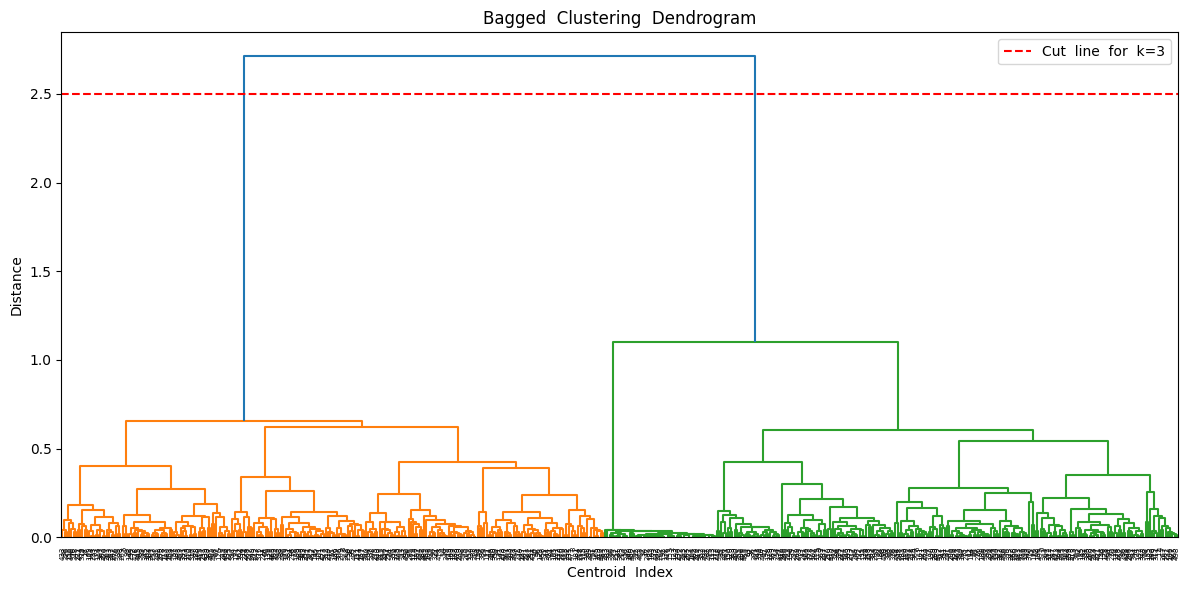

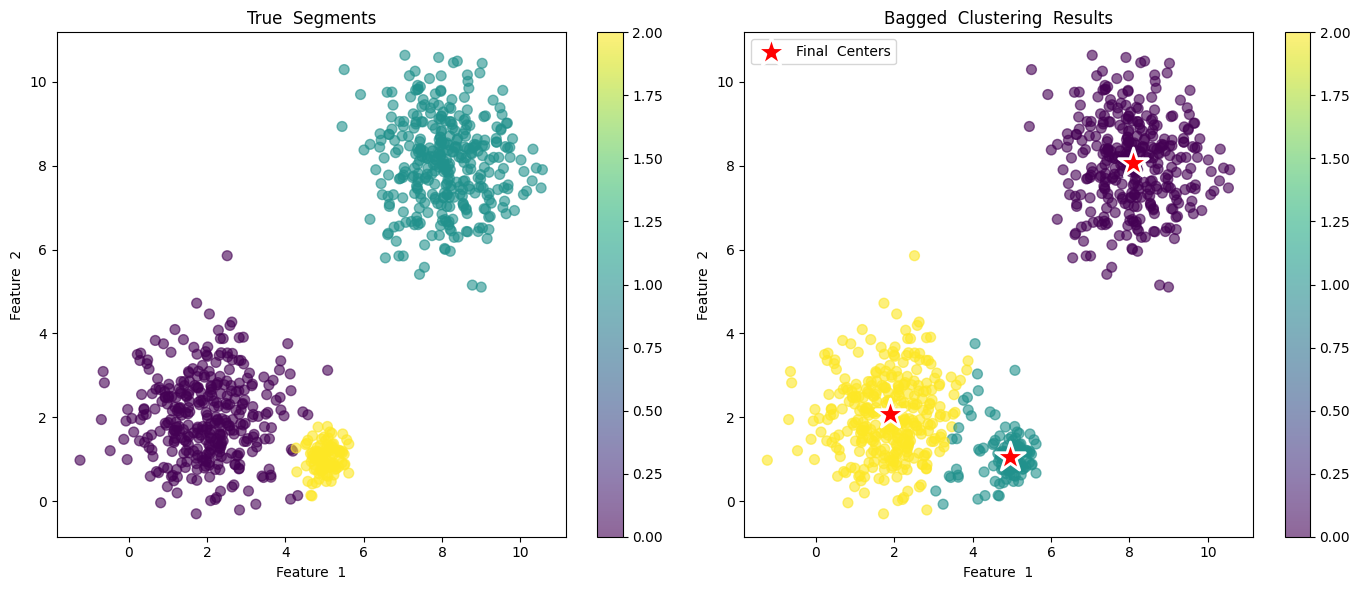


Segment  Sizes:
Segment  1:  350  consumers  (43.8%)
Segment  2:  124  consumers  (15.5%)
Segment  3:  326  consumers  (40.8%)


In [7]:
import  numpy  as  np
import  pandas  as  pd
from  sklearn.cluster  import  KMeans
from  scipy.cluster.hierarchy  import  dendrogram,  linkage,  fcluster
from  sklearn.preprocessing  import  StandardScaler
import  matplotlib.pyplot  as  plt
#  Generate  sample  data
np.random.seed(42)
n_consumers  =  800
#  Main  segments  +  niche  segment
main1  =  np.random.normal([2,  2],  [1,  1],  (350,  2))
main2  =  np.random.normal([8,  8],  [1,  1],  (350,  2))
niche  =  np.random.normal([5,  1],  [0.3,  0.3],  (100,  2))    #  Small  niche
data  =  np.vstack([main1,  main2,  niche])
true_labels  =  np.array([0]*350  +  [1]*350  +  [2]*100)
#  Standardize
scaler  =  StandardScaler()
data_scaled  =  scaler.fit_transform(data)
#  Bagged  clustering  parameters
n_bootstrap  =  50
base_k  =  10
#  Store  all  centroids  from  bootstrap  samples
all_centroids  =  []
print("Running  bagged  clustering...")
for  b  in  range(n_bootstrap):
    #  Bootstrap  sample
    indices  =  np.random.choice(len(data_scaled),  size=len(data_scaled), replace=True)
    bootstrap_data  =  data_scaled[indices]

    #  k-means  with  base_k  clusters
    kmeans  =  KMeans(n_clusters=base_k,  n_init=10,  random_state=b)
    kmeans.fit(bootstrap_data)

    #  Store  centroids
    all_centroids.append(kmeans.cluster_centers_)

#  Stack  all  centroids
all_centroids  =  np.vstack(all_centroids)
print(f"Collected  {len(all_centroids)}  centroids")
#  Hierarchical  clustering  on  centroids
linkage_matrix  =  linkage(all_centroids,  method='average')
#  Plot  dendrogram
plt.figure(figsize=(12,  6))
dendrogram(linkage_matrix)
plt.xlabel('Centroid  Index')
plt.ylabel('Distance')
plt.title('Bagged  Clustering  Dendrogram')
plt.axhline(y=2.5,  color='r',  linestyle='--',  label='Cut  line  for  k=3')
plt.legend()
plt.tight_layout()
plt.show()
#  Extract  k=3  segments  from  dendrogram
final_k  =  3
centroid_labels = fcluster(linkage_matrix, t=final_k, criterion='maxclust')
#  For  each  centroid,  compute  its  final  segment
#  Then  assign  original  consumers  to  segments
from  scipy.spatial.distance  import  cdist
#  Get  final  segment  centers  (mean  of  centroids  in  each  segment)
final_centers  =  np.array([all_centroids[centroid_labels  ==  j].mean(axis=0)
for  j  in  range(1,  final_k+1)])
#  Assign  original  consumers  to  nearest  final  center
distances  =  cdist(data_scaled,  final_centers)
consumer_segments  =  np.argmin(distances,  axis=1)
#  Visualize  results
fig,  (ax1,  ax2)  =  plt.subplots(1,  2,  figsize=(14,  6))
#  Original  data  with  true  labels
scatter1  =  ax1.scatter(data[:,  0],  data[:,  1],  c=true_labels,
cmap='viridis',  alpha=0.6,  s=50)
ax1.set_title('True  Segments')
ax1.set_xlabel('Feature  1')
ax1.set_ylabel('Feature  2')
plt.colorbar(scatter1,  ax=ax1)
#  Bagged  clustering  results
scatter2  =  ax2.scatter(data[:,  0],  data[:,  1],  c=consumer_segments,
cmap='viridis',  alpha=0.6,  s=50)
final_centers_orig  =  scaler.inverse_transform(final_centers)
ax2.scatter(final_centers_orig[:,  0],  final_centers_orig[:,  1],
c='red',  marker='*',  s=500,  edgecolors='white',  linewidth=2, label='Final  Centers')
ax2.set_title('Bagged  Clustering  Results')
ax2.set_xlabel('Feature  1')
ax2.set_ylabel('Feature  2')
ax2.legend()
plt.colorbar(scatter2,  ax=ax2)
plt.tight_layout()
plt.show()
#  Segment  sizes
print("\nSegment  Sizes:")
unique,  counts  =  np.unique(consumer_segments,  return_counts=True)
for  seg,  count  in  zip(unique,  counts):
    print(f"Segment  {seg+1}:  {count}  consumers  ({100*count/len(data):.1f}%)")

In [8]:
print("Bagged Clustering Segment Sizes:")
unique,  counts  =  np.unique(consumer_segments,  return_counts=True)
for  seg,  count  in  zip(unique,  counts):
    print(f"Segment  {seg+1}:  {count}  consumers  ({100*count/len(data):.1f}%)")

print("\nGaussian Mixture Model Segment Sizes:")
print(data_df['segment'].value_counts().sort_index())

print("\nGaussian Mixture Model Segment Profiles (Original Scale):")
print(data_df.groupby('segment')[['features',  'price']].agg(['mean',  'std']))

Bagged Clustering Segment Sizes:
Segment  1:  350  consumers  (43.8%)
Segment  2:  124  consumers  (15.5%)
Segment  3:  326  consumers  (40.8%)

Gaussian Mixture Model Segment Sizes:
segment
0     82
1    218
2    200
Name: count, dtype: int64

Gaussian Mixture Model Segment Profiles (Original Scale):
         features               price          
             mean       std      mean       std
segment                                        
0        4.729383  0.876092  8.178534  0.753816
1        7.972666  1.006723  7.921316  0.963334
2        1.975130  0.947746  2.013885  0.971286


# Python Implementation:  Stability Analysis

Running  bootstrap  stability  analysis...
    Bootstrap  pair  1/50
    Bootstrap  pair  11/50
    Bootstrap  pair  21/50
    Bootstrap  pair  31/50
    Bootstrap  pair  41/50


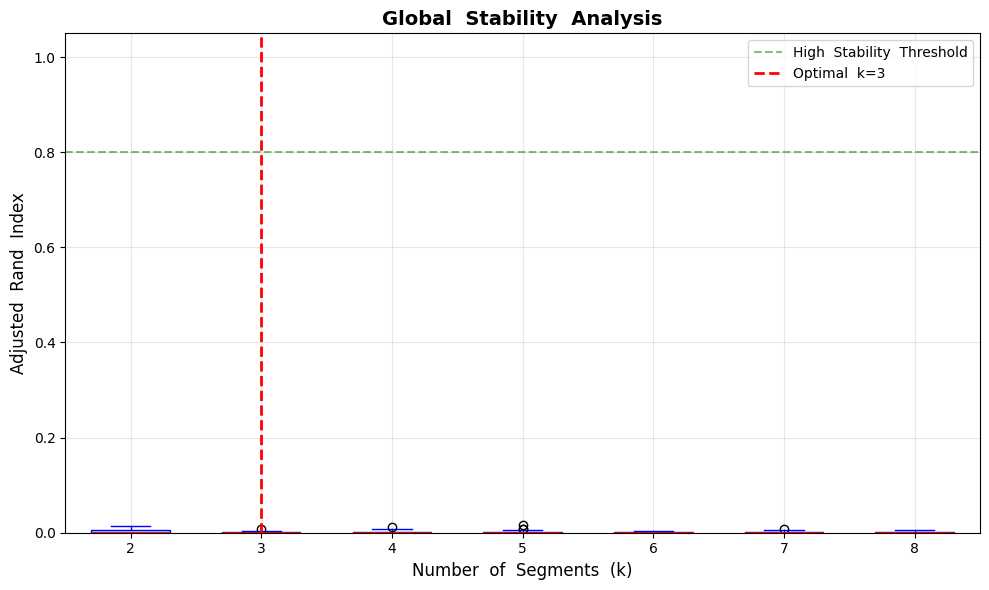


Optimal  number  of  segments:  3

Median  ARI  by  k:
    k=2:  -0.002
    k=3:  -0.000
    k=4:  -0.001
    k=5:  -0.001
    k=6:  -0.001
    k=7:  -0.000
    k=8:  -0.000


In [10]:
import  numpy  as  np
from  sklearn.cluster  import  KMeans
from  sklearn.metrics  import  adjusted_rand_score
import  matplotlib.pyplot  as  plt
def  bootstrap_stability_analysis(data,  k_range,  n_bootstrap_pairs=50):
    """
    Perform  global  stability  analysis  using  bootstrap  resampling.
    """
    n  =  len(data)
    ari_results  =  {k:  []  for  k  in  k_range}
    print("Running  bootstrap  stability  analysis...")
    for  pair_idx  in  range(n_bootstrap_pairs):
        if  pair_idx  %  10  ==  0:
            print(f"    Bootstrap  pair  {pair_idx+1}/{n_bootstrap_pairs}")
        #  Generate  pair  of  bootstrap  samples
        indices1 = np.random.choice(n, size=n, replace=True)
        indices2 = np.random.choice(n, size=n, replace=True)
        sample1  =  data[indices1]
        sample2  =  data[indices2]
        for  k  in  k_range:
            #  Cluster  both  samples
            kmeans1  =  KMeans(n_clusters=k,  n_init=10,  random_state=42)
            kmeans2  =  KMeans(n_clusters=k,  n_init=10,  random_state=42)
            labels1  =  kmeans1.fit_predict(sample1)
            labels2  =  kmeans2.fit_predict(sample2)
            #  Compute  adjusted  Rand  index
            ari  =  adjusted_rand_score(labels1,  labels2)
            ari_results[k].append(ari)
    return  ari_results
#  Example  usage
np.random.seed(42)
#  Generate  data  with  3  natural  segments
seg1  =  np.random.normal([2,  2],  [0.5,  0.5],  (200,  2))
seg2  =  np.random.normal([5,  5],  [0.5,  0.5],  (200,  2))
seg3  =  np.random.normal([8,  2],  [0.5,  0.5],  (200,  2))
data  =  np.vstack([seg1,  seg2,  seg3])
#  Run  stability  analysis
k_range  =  range(2,  9)
ari_results  =  bootstrap_stability_analysis(data,  k_range,  n_bootstrap_pairs=50)
#  Create  stability  boxplot
fig,  ax  =  plt.subplots(figsize=(10,  6))
positions  =  list(k_range)
ari_data  =  [ari_results[k]  for  k  in  k_range]
bp  =  ax.boxplot(ari_data,  positions=positions,  widths=0.6,  patch_artist=True, boxprops=dict(facecolor='lightblue',  edgecolor='blue'), medianprops=dict(color='red',  linewidth=2),
whiskerprops=dict(color='blue'),
capprops=dict(color='blue'))
ax.set_xlabel('Number  of  Segments  (k)',  fontsize=12)
ax.set_ylabel('Adjusted  Rand  Index',  fontsize=12)
ax.set_title('Global  Stability  Analysis',  fontsize=14,  fontweight='bold')
ax.set_ylim([0,  1.05])
ax.grid(True,  alpha=0.3)
ax.axhline(y=0.8,  color='green',  linestyle='--',  alpha=0.5, label='High  Stability  Threshold')
#  Highlight  optimal  k
medians  =  [np.median(ari_results[k])  for  k  in  k_range]
optimal_k  =  list(k_range)[np.argmax(medians)]
ax.axvline(x=optimal_k,  color='red',  linestyle='--',  linewidth=2, label=f'Optimal  k={optimal_k}')
ax.legend()
plt.tight_layout()
plt.show()
print(f"\nOptimal  number  of  segments:  {optimal_k}")
print("\nMedian  ARI  by  k:")
for  k  in  k_range:
    print(f"    k={k}:  {np.median(ari_results[k]):.3f}")